In [7]:
import sys
import pandas as pd
import numpy
import matplotlib
import seaborn
import sklearn

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [60]:
# reading the data
games = pd.read_csv('games.csv')
print(games.head())

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0

In [14]:
# printing the columns
print(games.columns)
# printing the rows and columns in the file
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


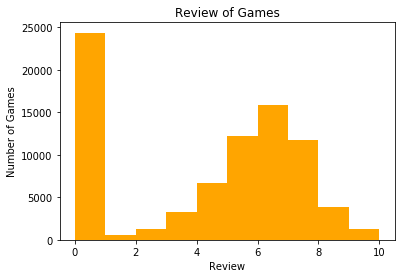

In [24]:
# ploting the histogram
plt.hist(games['average_rating'],color='orange')
plt.xlabel('Review')
plt.ylabel('Number of Games')
plt.title('Review of Games')
plt.show()

In [21]:
# to know more about matplotlib.pyplot
?plt.hist

In [28]:
# printing the first row with 0 review
print(games[games['average_rating']==0].iloc[0])
# printing the first row with more than 0 review
print(games[games['average_rating']>=0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

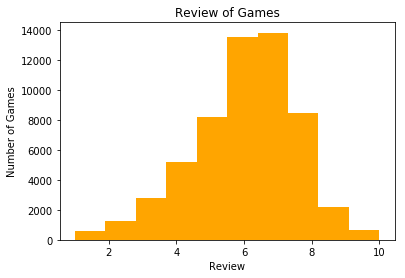

In [32]:
# removing the row where user doesnot rated
games = games[games['users_rated']>0]
# removing the rows having missing values
games = games.dropna(axis=0)
plt.hist(games['average_rating'],color='orange')
plt.xlabel('Review')
plt.ylabel('Number of Games')
plt.title('Review of Games')
plt.show()

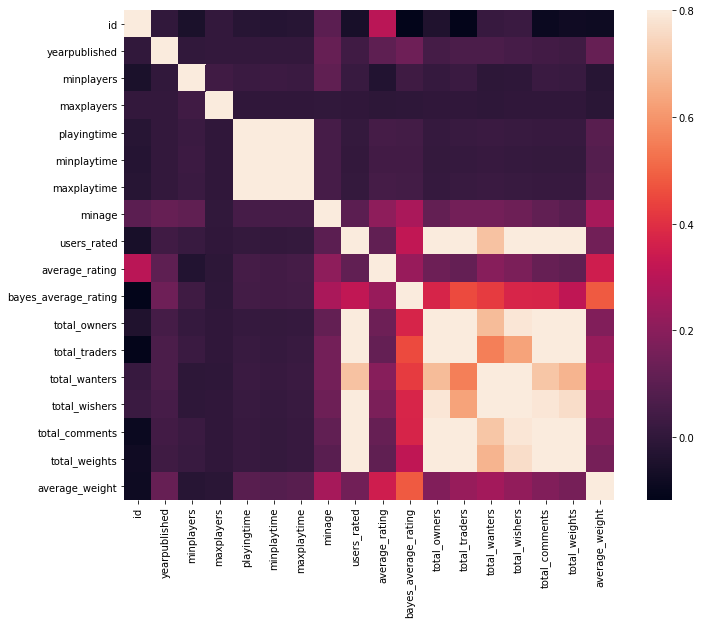

In [41]:
# correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [48]:
# getting all the columns from the dataframe
columns = games.columns.tolist()
# filer the columns to remove data we dont want
columns = [c for c in columns if c not in ['bayes_average_rating','average_rating','type','name','id']]
print(columns)
# store the varible we will be predicting on
target = 'average_rating'

['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [52]:
# generating training set and test dataset
from sklearn.model_selection import train_test_split

# generating training set
train = games.sample(frac=0.8,random_state=1)

# generating testing set
test = games.loc[~games.index.isin(train.index)]

# print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [53]:
# import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#initialize model class
lr = LinearRegression()

# fit the model with training data
lr.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# generating prediction for the training set
predictions = lr.predict(test[columns])

# compute error between our test prediction and actual values
mean_squared_error(predictions,test[target])

2.078819032629324

In [58]:
# import the random forest regression
from sklearn.ensemble import RandomForestRegressor

# initialise the model
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

# fit to the data
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [59]:
# generating prediction for the training set
predictions = RFR.predict(test[columns])

# compute error between our test prediction and actual values
mean_squared_error(predictions,test[target])

1.4458564605687358

In [62]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [67]:
# making prediction with both model
ratingLR = lr.predict(test[columns].iloc[0].values.reshape(1,-1))
ratingRFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

# predicting value
print(ratingLR)
print(ratingRFR)

# actual value
print(test[target].iloc[0])

[8.12061283]
[7.91373581]
8.07933
